## Final Project Submission

Please fill out:
* Student name: Sarah Lowing
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Abhineet
* Blog post URL: https://wordpress.com/post/datamonsterdotblog.wordpress.com/47


##### Rationale: Explaining why you are using statistical analyses rather than basic data analysis.
* For example, why are you using regression coefficients rather than just a graph?
* What about the problem or data is suitable for this form of analysis?
* For a data science audience, this includes your reasoning for the changes you applied while iterating between models
* The main reason to apply a linear transformation is so that the modeling results are more useful or interpretable to a stakeholder
* The reason to apply a log transformation is that you believe that the underlying relationship is not linear. 
* The goal of creating an interaction term is to capture the interaction between multiple independent variables in your linear regression model.
* Polynomial regression means transforming your features into quadratic (squared) or higher-order polynomial terms so that you can model a non-linear relationship using linear regression

##### Results: Describing the overall model metrics and feature coefficients
* You need at least one overall model metric (e.g. r-squared or RMSE) and at least two feature coefficients.
* For a business audience, make sure you connect any metrics to real-world implications. You do not need to get into the details of how linear regression works.
* For a data science audience, you don't need to explain what a metric is, but make sure you explain why you chose that particular one.

#### Limitations: Identifying the limitations and/or uncertainty present in your analysis
* This could include p-values/alpha values, confidence intervals, assumptions of linear regression, missing data, etc.
* In general, this should be more in-depth for a data science audience and more surface-level for a business audience.

##### Recommendations: Interpreting the model results and limitations in the context of the business problem
*What should stakeholders do with this information?

In [10]:
# import neccessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

In [21]:
## Check the columns and first few rows
df= pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [20]:
# Generate summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [18]:
#column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'greenbelt', 'nuisance', 'view',
       'condition', 'grade', 'heat_source', 'sewer_system', 'sqft_above',
       'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built',
       'yr_renovated', 'address', 'lat', 'long'],
      dtype='object')

In [25]:
#checking for null values
df.isnull().sum()

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [26]:
#Because of the small number of NaN values, we can drop null rows
df.dropna(inplace=True)

In [19]:
#Visualize datatypes for future analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [31]:
# Closer look at column values
x= open('Data/column_names.md')
print(x.read())

# Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house 

In [37]:
#examine correlation between price and numeric variables
abs(df.corr()["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
id               0.034096
long             0.022278
Name: price, dtype: float64

Our first step is to subset discrete and continous numeric variables, then generate plots to view their distributions

In [42]:
# Subset continuous numeric variables
kc_housing_subset_cn= df[['price','sqft_living', 'sqft_lot', 'sqft_patio']].copy()

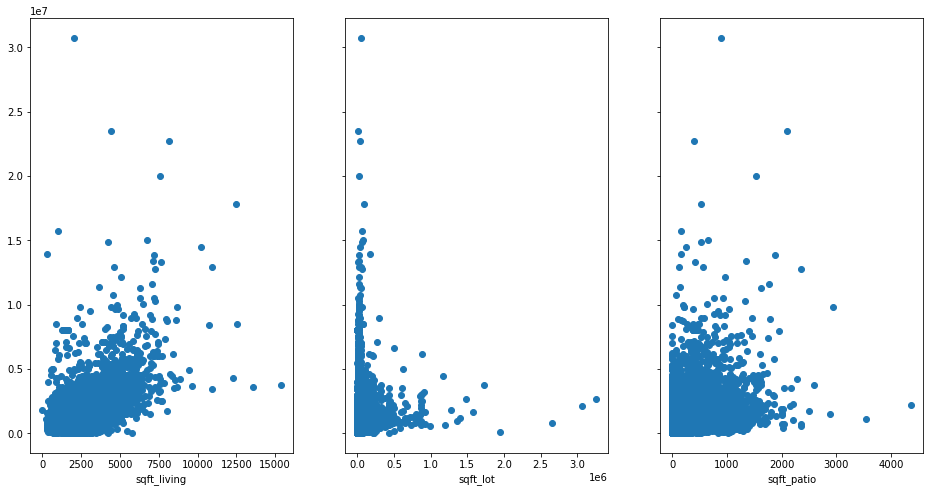

In [44]:
# Visualize relationships between variables and price
fig,axes= plt.subplots(ncols=3, figsize=(16,8), sharey=True)

for i, c in enumerate(kc_housing_subset_cn.drop('price', axis=1).columns):
    ax=axes[i]
    ax.scatter(kc_housing_subset_cn[c], kc_housing_subset_cn['price'])
    ax.set_xlabel(c)

In [45]:
# Subset discrete numeric variables
kc_housing_subset_dn= df[['price','yr_built', 'bedrooms', 'yr_renovated']].copy()

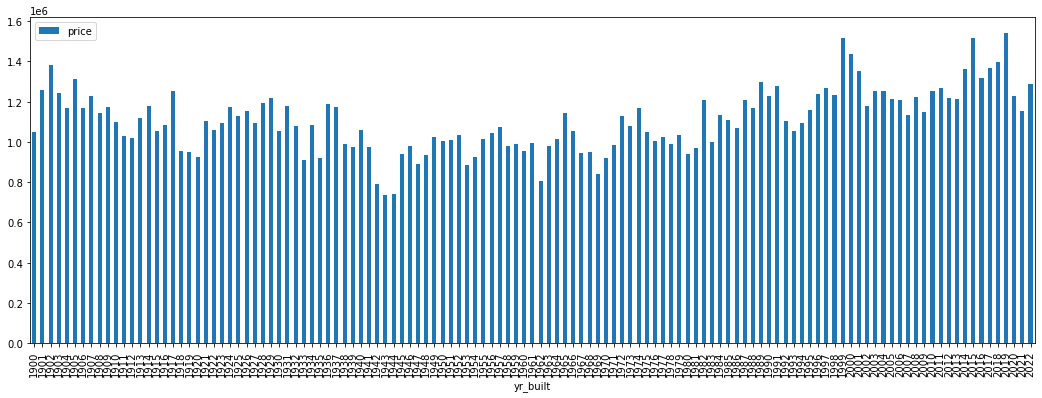

In [64]:
# Visualize relationships between variables and price 
fig, ax = plt.subplots(figsize=(18,6))
kc_housing_subset_dn.groupby("yr_built").mean().plot.bar(y="price", ax=ax)
plt.xticks(rotation='vertical');


In [ ]:
# Generate scatterplots of numeric variables to check for normal distribution

Our next step is to subset at the categorical variables, then convert them to one hot encoding (ohe) in order to view their correlation.

In [ ]:
# Subset categorical variables

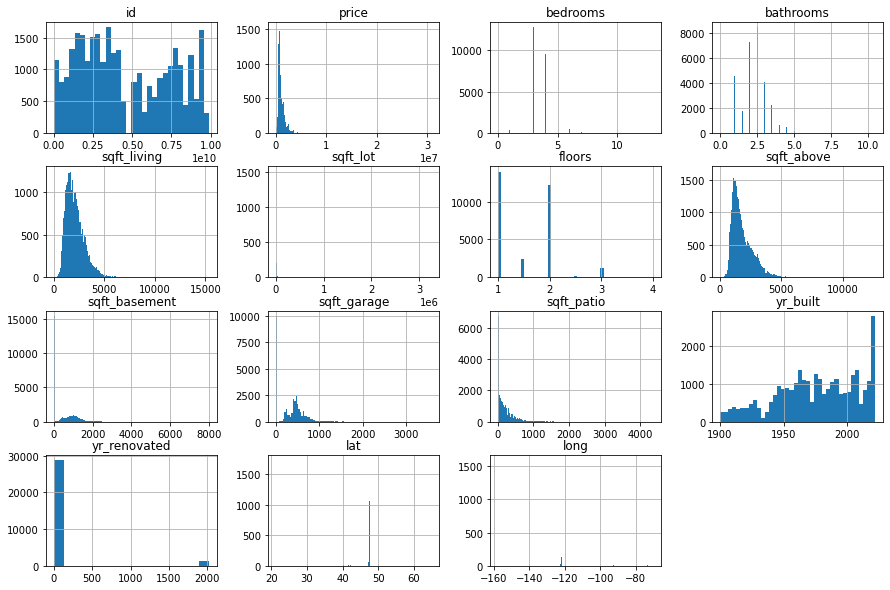

In [32]:
#generate histograms of categorical variables to check for normal distribution
